In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


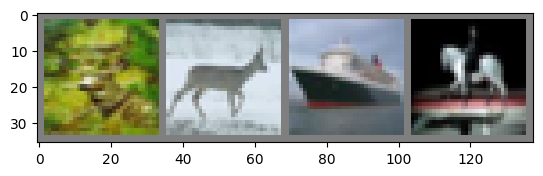

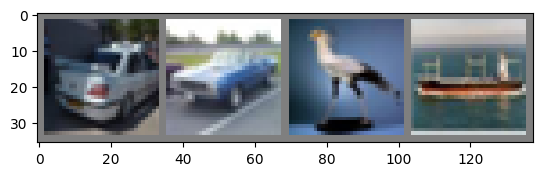

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


dataiter = iter(trainloader)
images, labels = next(dataiter)


img_grid = torchvision.utils.make_grid(images)
img_grid = img_grid / 2 + 0.5
npimg = img_grid.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images, nrow=8))

In [ ]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.831
[1,  6000] loss: 1.664
[1,  8000] loss: 1.560
[1, 10000] loss: 1.521
[1, 12000] loss: 1.475
[2,  2000] loss: 1.373
[2,  4000] loss: 1.356
[2,  6000] loss: 1.341
[2,  8000] loss: 1.313
[2, 10000] loss: 1.283
[2, 12000] loss: 1.279
[3,  2000] loss: 1.189
[3,  4000] loss: 1.201
[3,  6000] loss: 1.201
[3,  8000] loss: 1.175
[3, 10000] loss: 1.177
[3, 12000] loss: 1.159
[4,  2000] loss: 1.079
[4,  4000] loss: 1.105
[4,  6000] loss: 1.076
[4,  8000] loss: 1.103
[4, 10000] loss: 1.110
[4, 12000] loss: 1.085
[5,  2000] loss: 1.005
[5,  4000] loss: 1.018
[5,  6000] loss: 1.019
[5,  8000] loss: 1.031
[5, 10000] loss: 1.043
[5, 12000] loss: 1.029
[6,  2000] loss: 0.951
[6,  4000] loss: 0.973
[6,  6000] loss: 0.973
[6,  8000] loss: 0.964
[6, 10000] loss: 0.990
[6, 12000] loss: 0.989
[7,  2000] loss: 0.892
[7,  4000] loss: 0.906
[7,  6000] loss: 0.938
[7,  8000] loss: 0.958
[7, 10000] loss: 0.941
[7, 12000] loss: 0.926
[8,  2000] loss: 0.843
[8,  4000] 

In [ ]:
class Net(nn.Module):
    def __init__(self):

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.dropout1 = nn.Dropout(0.5)

    def forward(self, x):

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  #

        return x


In [ ]:
images, labels = next(iter(testloader))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))


Predicted:  ship  ship  ship  ship 


In [ ]:

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)



In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy}%')


Accuracy on the test dataset: 63.04%
